# Airlines

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
airlines=pd.read_csv("C:\\Users\\data\\OneDrive\\Desktop\\ExcelR\\Airlines+Data.csv")
airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

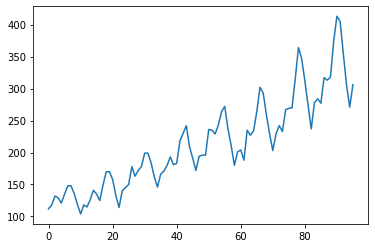

In [3]:
airlines.Passengers.plot()

In [4]:
len(airlines['Passengers'])

96

In [5]:
Train=airlines.head(80)
Test=airlines.tail(16)

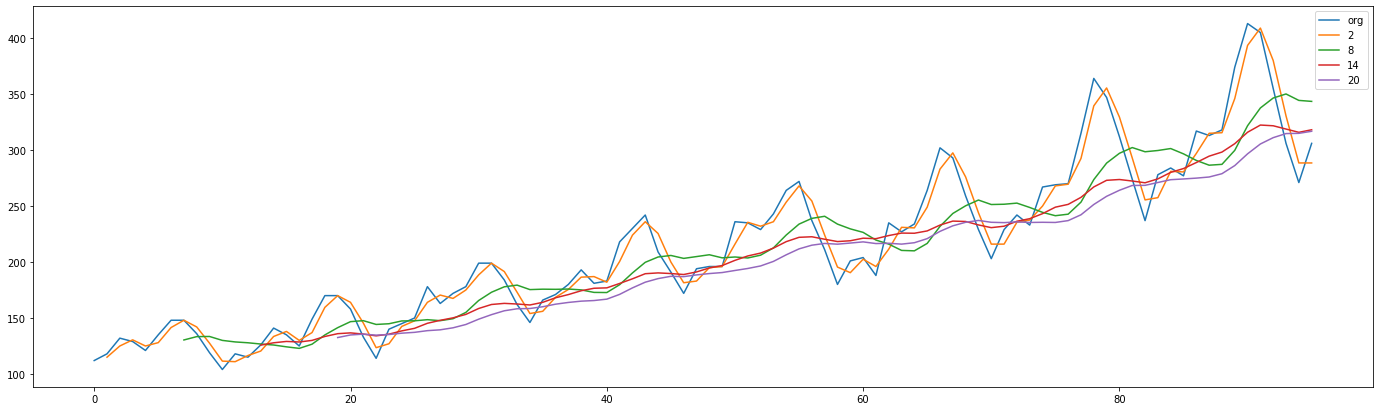

In [6]:
plt.figure(figsize=(24,7))
airlines.Passengers.plot(label='org')
for i in range(2,24,6):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.legend(loc='best')

C:\Users\ARMANS~1\AppData\Local\Temp/ipykernel_2336/4038562820.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add=seasonal_decompose(airlines.Passengers,freq=16)


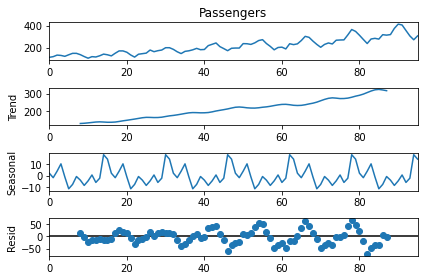

In [7]:
decompose_ts_add=seasonal_decompose(airlines.Passengers,freq=16)
decompose_ts_add.plot()
plt.show()

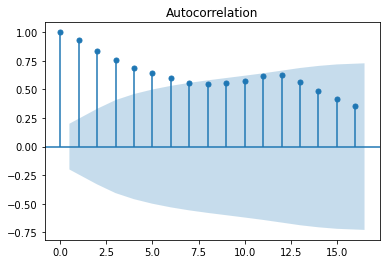

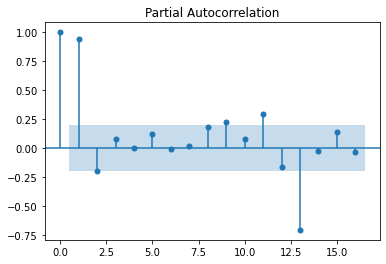

In [9]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=16)
tsa_plots.plot_pacf(airlines.Passengers,lags=16)
plt.show()

In [10]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

In [12]:
ses_model=SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Passengers)

E:\Personal Docs\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


11.375850554268094

In [14]:
#holt method
hw_model=Holt(Train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw=hw_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\ARMANS~1\AppData\Local\Temp/ipykernel_2336/3282945446.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model=Holt(Train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)


51.934439843631175

In [16]:
hwe_model_add_add=ExponentialSmoothing(Train['Passengers'],seasonal='add',trend='add',
                                       seasonal_periods=12).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

7.608762162918885

In [17]:
hwe_model_add_add.forecast(20)

80    323.500226
81    300.499853
82    279.499167
83    300.999099
84    305.166599
85    306.023346
86    333.309288
87    327.165273
88    326.450793
89    350.451309
90    375.451925
91    374.595655
92    351.095880
93    328.095508
94    307.094822
95    328.594754
96    332.762253
97    333.619001
98    360.904943
99    354.760928
dtype: float64